In [82]:
import pandas as pd
import matplotlib.pyplot as plt

In [83]:
from datetime import timedelta

df = pd.read_csv('../input/ipca_202402SerieHist_treated.csv', parse_dates={'dt': ['ANO', 'MES']}, date_format='%Y-%m')
df.dt = pd.to_datetime(df.dt, format='%Y %m')
df.set_index('dt', inplace=True)

ipca_weekly = df[' VAR (%) . NO MES'].resample('W').mean()
ipca_weekly = ipca_weekly.interpolate(method='linear')
ipca_weekly_df = pd.DataFrame(ipca_weekly)
ipca_weekly_df["first_day_week"] = ipca_weekly_df.index - ipca_weekly_df.index.weekday * timedelta(days=1)
ipca_weekly_df_filtered = ipca_weekly_df[ipca_weekly_df.index >= '2016-04-24']
ipca_weekly_df_filtered['first_day_week'] = ipca_weekly_df_filtered['first_day_week'].dt.strftime('%Y-%m-%d')

/tmp/ipykernel_122602/2386686423.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipca_weekly_df_filtered['first_day_week'] = ipca_weekly_df_filtered['first_day_week'].dt.strftime('%Y-%m-%d')


In [73]:

price_df = pd.read_csv('../processed_data/price_weather_weekly_df-2016-2023.csv', parse_dates=['dt'])
price_df.set_index('dt', inplace=True)
price_df

,Alface Americana - Roça,Alface Crespa - Roça,Alface Lisa - Roça,Alface Americana - Atacado,Alface Crespa - Atacado,first_day_week,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),...,TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
dt,,,,,,,,,,,,,,,,,,,,,
2016-04-24 00:00:00+00:00,0.592500,0.616500,0.618000,NaN,NaN,2016-04-18 00:00:00+00:00,0.000000,907.386111,907.597222,907.213889,...,21.968056,20.484722,16.069444,14.787500,75.597222,67.736111,71.763889,219.597222,1.976389,0.140278
2016-05-01 00:00:00+00:00,1.000000,0.426111,0.500000,NaN,NaN,2016-04-25 00:00:00+00:00,0.145238,905.865476,906.075000,905.628571,...,17.910119,17.040476,14.511310,13.772024,84.839286,81.220238,83.279762,174.041667,3.461905,0.521429
2016-05-08 00:00:00+00:00,1.041667,0.437778,0.479444,NaN,NaN,2016-05-02 00:00:00+00:00,0.021429,909.642262,909.846429,909.453571,...,16.691667,15.564881,14.151786,13.103571,88.702381,83.500000,86.303571,197.541667,1.684524,0.204762
2016-05-15 00:00:00+00:00,1.055833,0.430556,0.430556,NaN,NaN,2016-05-09 00:00:00+00:00,0.215476,909.359524,909.569643,909.135714,...,17.743452,16.867262,15.407143,14.588095,89.601190,84.839286,87.196429,189.976190,2.242262,0.270238
2016-05-22 00:00:00+00:00,0.764167,0.444444,0.398333,NaN,NaN,2016-05-16 00:00:00+00:00,0.115476,908.848810,909.090476,908.598810,...,18.666667,17.812500,15.844643,15.135119,87.083333,82.839286,84.976190,208.922619,3.440476,0.574405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-03 00:00:00+00:00,1.875000,0.750000,0.750000,1.0,0.5,2023-11-27 00:00:00+00:00,0.077381,905.600595,905.836012,905.375595,...,21.935119,20.800893,18.759821,17.689583,86.452381,79.440476,83.136905,183.988095,4.221131,1.291071
2023-12-10 00:00:00+00:00,1.458333,0.677083,0.677083,1.0,0.5,2023-12-04 00:00:00+00:00,0.697619,906.600000,906.830357,906.368452,...,21.825000,20.777976,19.458929,18.419643,90.095238,84.946429,87.648810,154.059524,3.461310,0.982738
2023-12-17 00:00:00+00:00,1.125000,0.562500,0.562500,1.0,0.5,2023-12-11 00:00:00+00:00,0.347619,906.604464,906.823512,906.398512,...,20.994940,19.836310,17.822917,16.600000,86.422619,79.940476,83.294643,186.979167,3.731845,1.075595


In [74]:
price_ipca_df = pd.merge(price_df, ipca_weekly_df_filtered, on='first_day_week', how='left')
price_ipca_df

ValueError: You are trying to merge on object and datetime64[ns] columns for key 'first_day_week'. If you wish to proceed you should use pd.concat

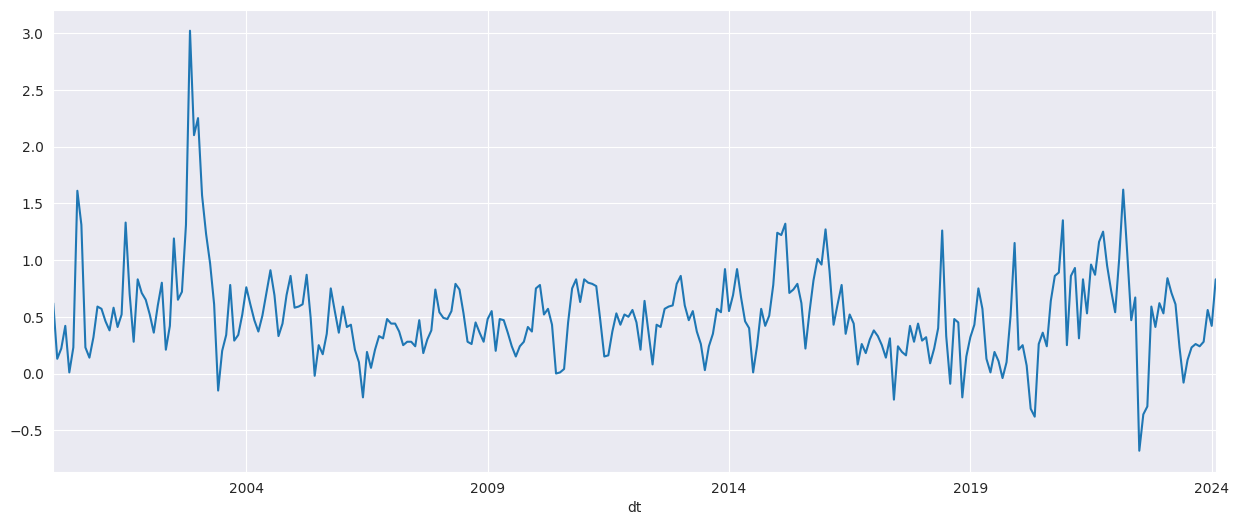

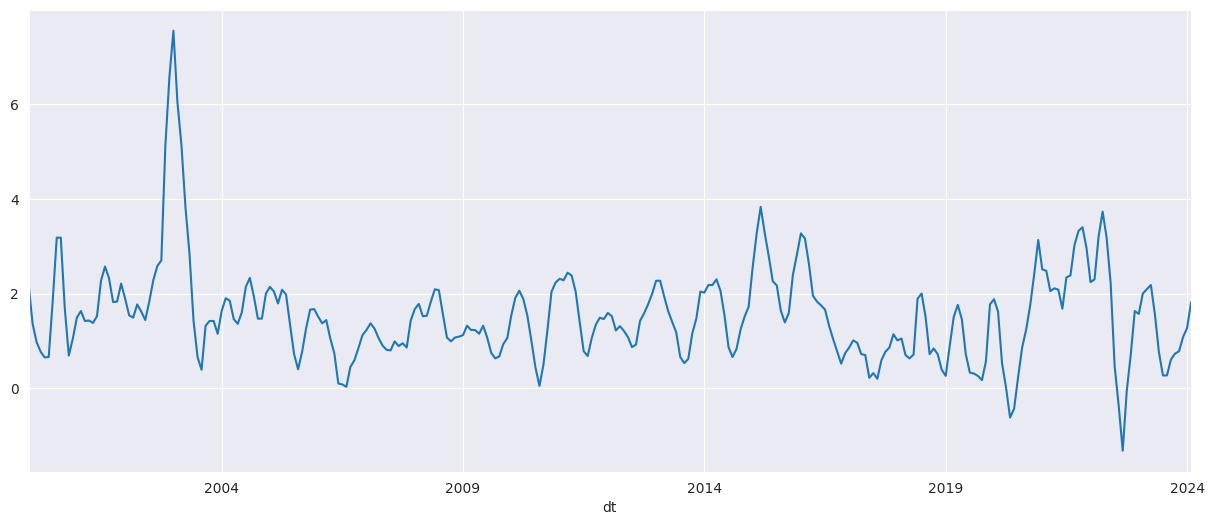

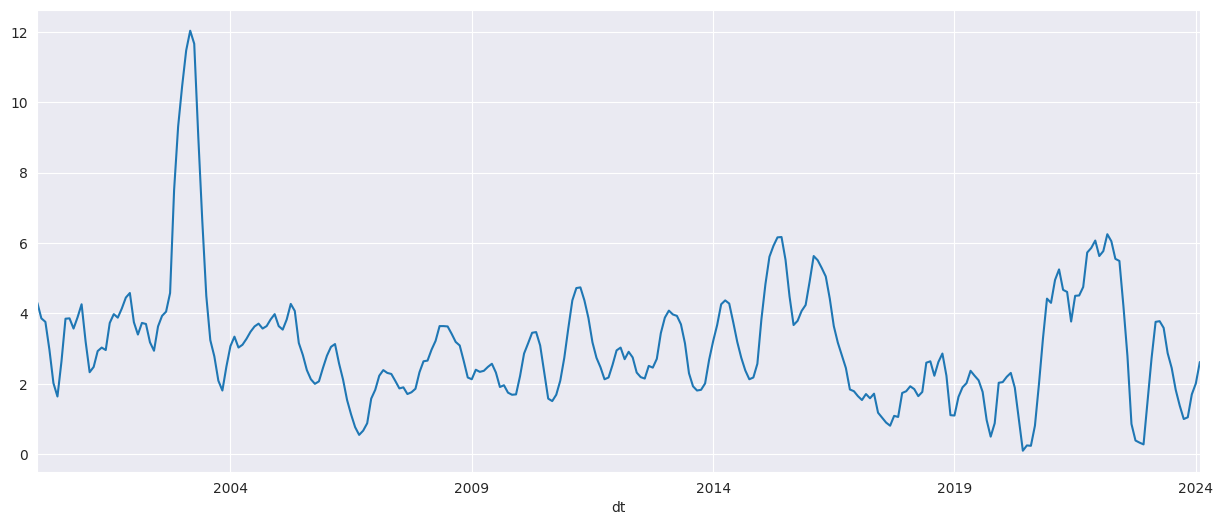

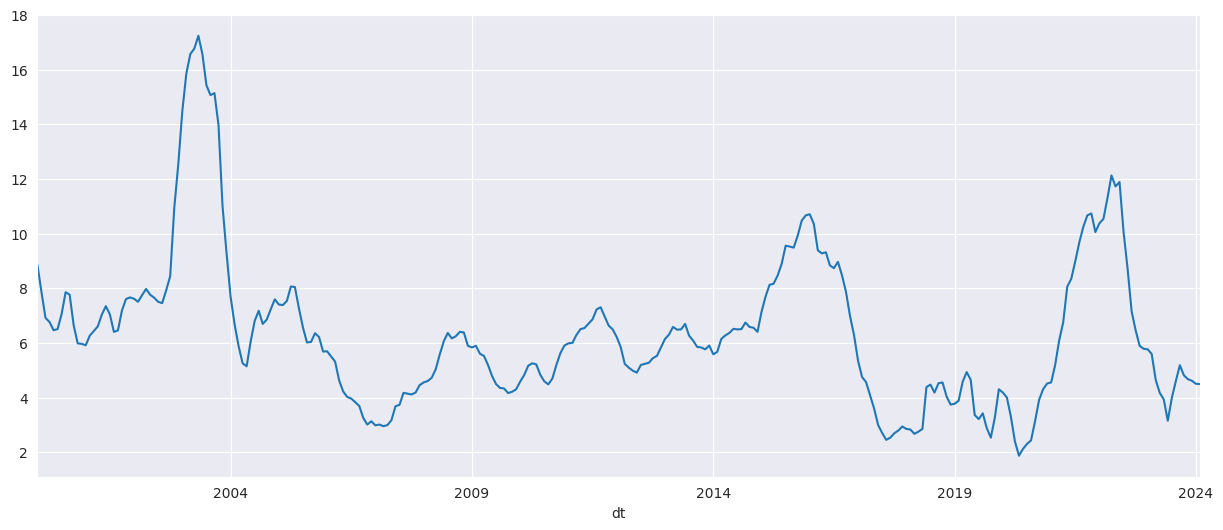

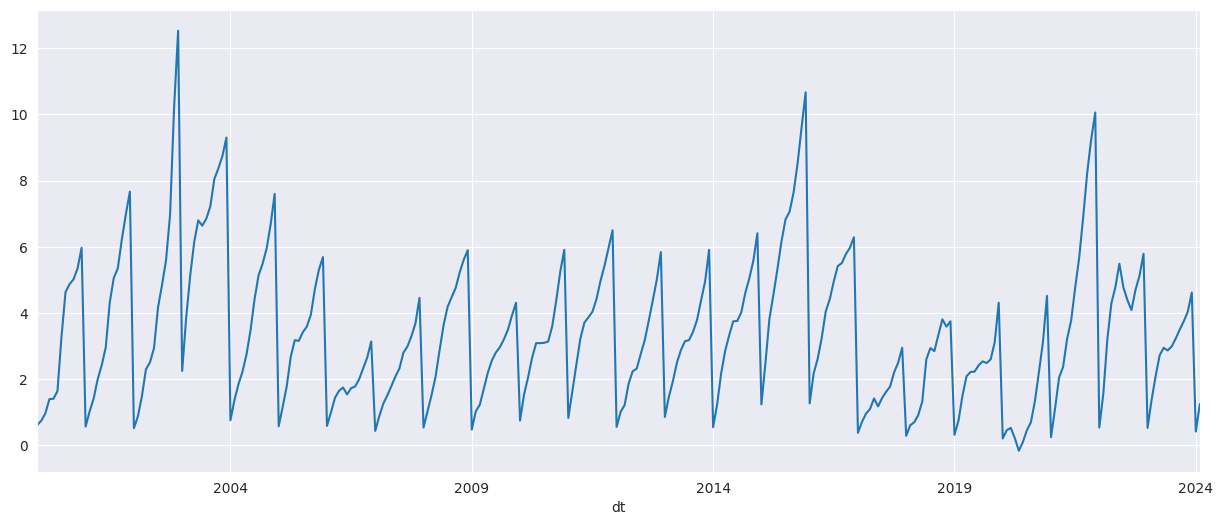

In [60]:
df[df.index >= '2000-01-01'][' VAR (%) . NO MES'].plot(figsize=(15,6))
plt.show()
df[df.index >= '2000-01-01'][' VAR (%). 3 MESES'].plot(figsize=(15,6))
plt.show()
df[df.index >= '2000-01-01'][' VAR (%). 6 MESES'].plot(figsize=(15,6))
plt.show()
df[df.index >= '2000-01-01'][' VAR (%). 12 MESES'].plot(figsize=(15,6))
plt.show()
df[df.index >= '2000-01-01'][' VAR (%). NO ANO'].plot(figsize=(15,6))
plt.show()